In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.model_selection import train_test_split
import altair as alt
import seaborn as sns
import numpy as np

In [2]:
 # fetch dataset 
abalone = fetch_ucirepo(id=1) 

# Extract features and targets
X = abalone.data.features
y = abalone.data.targets

In [3]:
# Split Data (Same random_state as baseline for comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=522
)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

## Distribution of target
There are outliers, but no anomalous values below 0 or very high.

<Axes: xlabel='Rings'>

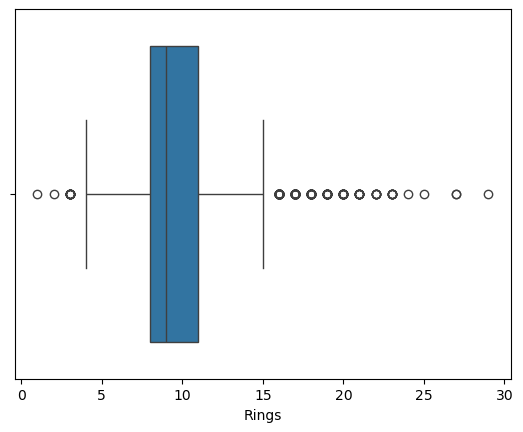

In [4]:
sns.boxplot(data=train_df, x='Rings')

<Axes: xlabel='Rings', ylabel='Count'>

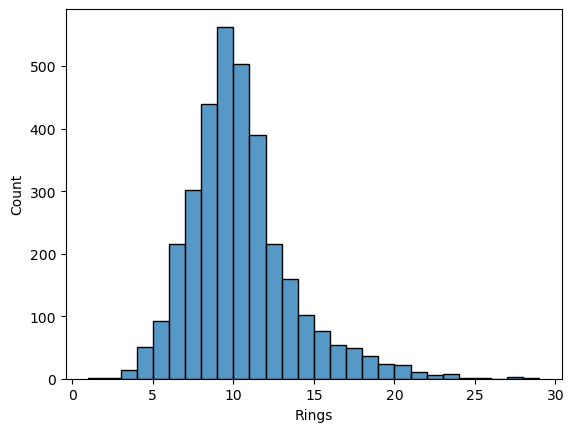

In [5]:
sns.histplot(data=train_df, x='Rings', binwidth=1)

In [6]:
from scipy.stats import shapiro
normal_pvalue = shapiro(train_df.Rings).pvalue
try:
    assert normal_pvalue > 0.05
except AssertionError:
    print(f"Target variable is not normal! Shapiro p-value: {normal_pvalue}")

Target variable is not normal! Shapiro p-value: 1.7121391423967805e-36


## Correlations
There are no anomalous correlations between Rings and features.

There are high correlations between most features. This can possibly be accounted for through L2 regularisation.

<Axes: >

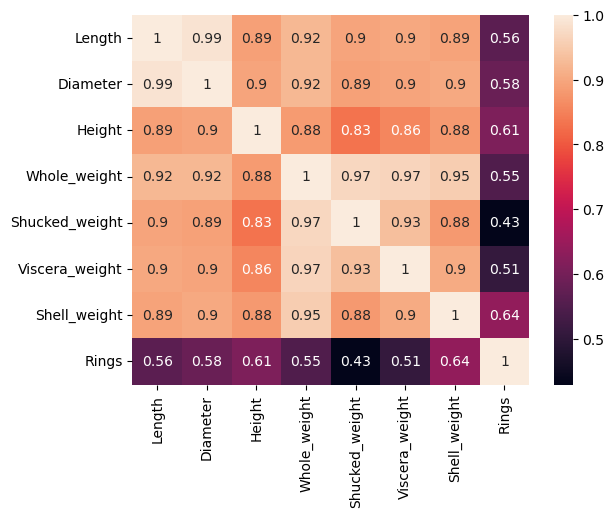

In [7]:
corr_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True)

In [8]:
threshold = 0.9
exceeds_threshold = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j].round(4)) 
 for i, j in np.argwhere(corr_matrix > threshold)]
try:
    assert len(exceeds_threshold) == 0
except AssertionError:
    print(f"Anomalous correlations above {threshold}!")
    print(exceeds_threshold)

Anomalous correlations above 0.9!
[('Length', 'Length', np.float64(1.0)), ('Length', 'Diameter', np.float64(0.9867)), ('Length', 'Whole_weight', np.float64(0.9237)), ('Length', 'Viscera_weight', np.float64(0.9009)), ('Diameter', 'Length', np.float64(0.9867)), ('Diameter', 'Diameter', np.float64(1.0)), ('Diameter', 'Whole_weight', np.float64(0.9238)), ('Diameter', 'Shell_weight', np.float64(0.9024)), ('Height', 'Height', np.float64(1.0)), ('Whole_weight', 'Length', np.float64(0.9237)), ('Whole_weight', 'Diameter', np.float64(0.9238)), ('Whole_weight', 'Whole_weight', np.float64(1.0)), ('Whole_weight', 'Shucked_weight', np.float64(0.9696)), ('Whole_weight', 'Viscera_weight', np.float64(0.9662)), ('Whole_weight', 'Shell_weight', np.float64(0.9544)), ('Shucked_weight', 'Whole_weight', np.float64(0.9696)), ('Shucked_weight', 'Shucked_weight', np.float64(1.0)), ('Shucked_weight', 'Viscera_weight', np.float64(0.9336)), ('Viscera_weight', 'Length', np.float64(0.9009)), ('Viscera_weight', 'Whol